# Unsupervised Learning : University Ranking

             Réalisé par: Yassine DERBEL, Chaimae SGHIOURI IDRISSI, Yosr BEN JEMAA, Hamdi SGHIR, El habib ABDERRRAHIM


## I - Contexte:

#### 1- Introduction

L'intéret de ce challenge est de mêner une étude pour classifer les données contenues dans notre dataset, en utilisant l'EDA pour comprendre le jeu de données, la relation entre les variables,... et puis, en procédant à un prétraitement de données pour pouvoir ensuite construire des modèles de Machine Learning non supervisé.


#### 2- Cadre du projet

###### 2.1 Présentation de l'existant:

Nous avons à notre disposition un jeu de données regroupant  16 informations sur 1396 observations notamment:

- Rank_Char: ranking according to The Times Higher Education (varchar)

- ScoreRank: ranking according to the column "Scoreresult" (number)

- University: name of the university.

- Country: country of the university.

- Number_students: number of students.

- Numbstudentsper_Staff: ratio between the number of students and the staff.

- International_Students: percentage of international students.

- Percentage_Female: percentage of women.

- Percentage_Male: percentage of men.

- Overall_Ranking. Ranking according to The Times Higher Education (varchar)

- Teaching: score in teaching.

- Research: score in research.

- Citations: score in citations.

- Industry_Income: score in industry income.

- International_Outlook: score in international outlook.

- ScoreResult: resulting score: (30% teaching, 30% research, 30% citations, 7.5% international outlook, 2.5% IndustryIncome). This variable has been calculated according to the aforementioned weights.

###### 2.2  Problématique:

Analyser et regrouper l'ensemble de données non étiquetés existants.



###### 2.3 Solution




Construire des modèles de Machine learning non supervisé en exploitant le jeu de données existant

## II- Analyse des données:

### 1- Importing Libraries

In [ ]:
#@title
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

#Library for 3D plots
import plotly.express as px

# K-means function
from sklearn.cluster import KMeans

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# Function to standardize the data 
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#Functions for PCA
from sklearn.decomposition import PCA

# Functions for hierarchical clustering
from sklearn.model_selection import ParameterGrid
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


### 2- Preprocessing Data


In [ ]:
#@title
#importer le jeu de données
df=pd.read_csv("/content/Word_University_Rank_2020.csv",delimiter=',')


In [ ]:
#@title
#comprendre le jeu de données
#afficher les 10 premières lignes
df.head(10)


Rank_Char  Score_Rank                             University  \
0         1           1                   University of Oxford   
1         2           2     California Institute of Technology   
2         3           3                University of Cambridge   
3         4           4                    Stanford University   
4         5           5  Massachusetts Institute of Technology   
5         6           6                   Princeton University   
6         7           7                     Harvard University   
7         8           8                        Yale University   
8         9           9                  University of Chicago   
9        10          10                Imperial College London   

          Country Number_students  Numb_students_per_Staff  \
0  United Kingdom          20,664                     11.2   
1   United States           2,240                      6.4   
2  United Kingdom          18,978                     10.9   
3   United States          16,135                      7.3   
4   United States          11,247                      8.6   
5   United States           7,983                      8.1   
6   United States          20,823                      9.2   
7   United States          12,402                      5.4   
8   United States          13,833                      5.7   
9  United Kingdom          16,760                     11.7   

  International_Students Percentage_Female Percentage_Male  Teaching  \
0                    41%               46%             54%      90.5   
1                    30%               34%             66%      92.1   
2                    37%               47%             53%      91.4   
3                    23%               43%             57%      92.8   
4                    34%               39%             61%      90.5   
5                    25%               45%             55%      90.3   
6                    24%               49%             51%      89.2   
7                    20%               50%             50%      92.0   
8                    28%               46%             54%      89.1   
9                    56%               38%             62%      84.5   

   Research  Citations  Industry_Income  International_Outlook  Score_Result  \
0      99.6       98.4             65.5                   96.4          95.4   
1      97.2       97.9             88.0                   82.5          94.5   
2      98.7       95.8             59.3                   95.0          94.4   
3      96.4       99.9             66.2                   79.5          94.3   
4      92.4       99.5             86.9                   89.0          93.6   
5      96.3       98.8             58.6                   81.1          93.2   
6      98.6       99.1             47.3                   76.3          93.0   
7      94.8       97.3             52.4                   68.7          91.7   
8      91.4       96.7             52.7                   76.0          90.2   
9      87.6       97.0             69.9                   97.1          89.8   

  Overall_Ranking  
0           95.40  
1           94.50  
2           94.40  
3           94.30  
4           93.60  
5           93.20  
6           93.00  
7           91.70  
8           90.20  
9           89.80

In [ ]:
#informations sur le jeu de données (min, max, count,....)
df.describe()

Score_Rank  Numb_students_per_Staff     Teaching     Research  \
count  1396.000000              1396.000000  1396.000000  1396.000000   
mean    315.304441                18.966905    28.229083    23.981160   
std     140.946223                16.835492    14.149550    17.537044   
min       1.000000                 0.900000    11.200000     6.800000   
25%     212.000000                12.375000    18.300000    11.600000   
50%     336.000000                16.350000    23.800000    18.000000   
75%     437.000000                21.900000    33.600000    30.100000   
max     535.000000               493.500000    92.800000    99.600000   

         Citations  Industry_Income  International_Outlook  Score_Result  
count  1396.000000      1396.000000            1396.000000   1396.000000  
mean     48.113109        46.477292              47.114542     34.794054  
std      27.735626        16.273498              23.288723     16.946075  
min       1.700000        34.400000              13.100000     10.700000  
25%      23.375000        35.775000              27.475000     21.000000  
50%      45.650000        39.400000              43.100000     31.600000  
75%      71.950000        49.825000              62.800000     44.500000  
max     100.000000       100.000000              99.700000     95.400000

In [ ]:
df.isnull().mean() #nombre de valeurs nulles par colonne

Rank_Char                  0.0
Score_Rank                 0.0
University                 0.0
Country                    0.0
Number_students            0.0
Numb_students_per_Staff    0.0
International_Students     0.0
Percentage_Female          0.0
Percentage_Male            0.0
Teaching                   0.0
Research                   0.0
Citations                  0.0
Industry_Income            0.0
International_Outlook      0.0
Score_Result               0.0
Overall_Ranking            0.0
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank_Char                1396 non-null   object 
 1   Score_Rank               1396 non-null   int64  
 2   University               1396 non-null   object 
 3   Country                  1396 non-null   object 
 4   Number_students          1396 non-null   object 
 5   Numb_students_per_Staff  1396 non-null   float64
 6   International_Students   1396 non-null   object 
 7   Percentage_Female        1396 non-null   object 
 8   Percentage_Male          1396 non-null   object 
 9   Teaching                 1396 non-null   float64
 10  Research                 1396 non-null   float64
 11  Citations                1396 non-null   float64
 12  Industry_Income          1396 non-null   float64
 13  International_Outlook    1396 non-null   float64
 14  Score_Result            

* Toutes les valeurs de la base de données sont non nulles. 
* On remarque que les colonnes 6,7,8 et 9 ne sont pas dans le bon type. On choisit donc de convertir les pourcentages en valeurs numériques réelles.

In [ ]:
#@title
# transform percentage to float ratio
def StringToFloat(ch):
   return float(ch.replace("%", "").replace(",", "."))/100

In [ ]:
#@title
for index, row in df.iterrows():
  if df["International_Students"][index] == "%" :
    df = df.drop([index]) 
    #En essayant de convertir les types des données, on a remarqué que 2 lignes comportent une valeur de "%"  
    # pour la colonne "International_Students". 
    #On choisi alors de les éliminer 

df['Percentage_Female'] = df['Percentage_Female'].apply(StringToFloat)
df['Percentage_Male'] = df['Percentage_Male'].apply(StringToFloat)
df['International_Students'] = df['International_Students'].apply(StringToFloat)

* De plus, on élimine les colonnes de Over_all ranking et Rank_Char parce qu'elles peuvent être remplacées respectivement par les colonnes Score_Result et Score_Rank.

In [ ]:
#@title
df.drop(columns=['Overall_Ranking'], inplace=True)
df.drop(columns=['Rank_Char'], inplace=True)

In [ ]:
#@title
df.dtypes, df.shape

(Score_Rank                   int64
 University                  object
 Country                     object
 Number_students            float64
 Numb_students_per_Staff    float64
 International_Students     float64
 Percentage_Female          float64
 Percentage_Male            float64
 Teaching                   float64
 Research                   float64
 Citations                  float64
 Industry_Income            float64
 International_Outlook      float64
 Score_Result               float64
 dtype: object, (1394, 14))

In [ ]:
df.duplicated(keep='first').value_counts()

False    1394
dtype: int64

#### Commentaires
- Le  jeu de données contient 1394 observations (non dupliquées) sur 14 variables de type numérique et catégorielle, sans aucune valeur manquante.



### 3- Analyse Exploratoire

Dans cette partie, on étudira les données plus en détails en utilisant des outils de visualisations de données (Heatmap, 2D and 3D scatter plots..)

#### 3.1 Heatmap

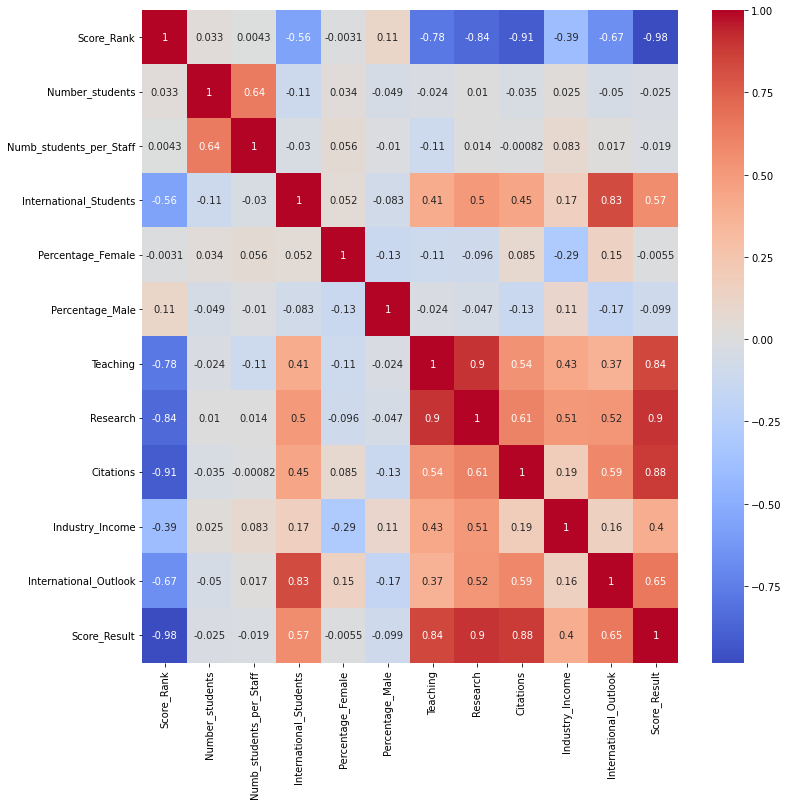

In [ ]:
#@title
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

ScoreResult: resulting score: (30% teaching, 30% research, 30% citations, 7.5% international outlook, 2.5% IndustryIncome).
La carte de chaleur indique une forte correlation entre ScoreResult et ces variables.

#### 3.2 Boxplot

In [ ]:
df.describe()

Score_Rank  Number_students  Numb_students_per_Staff  \
count  1394.000000      1394.000000              1394.000000   
mean    315.108321     23735.875179                18.973458   
std     140.926421     32847.022056                16.846575   
min       1.000000       558.000000                 0.900000   
25%     212.000000     10267.500000                12.325000   
50%     336.000000     17832.500000                16.400000   
75%     437.000000     29436.000000                21.900000   
max     535.000000    830104.000000               493.500000   

       International_Students  Percentage_Female  Percentage_Male  \
count             1394.000000        1394.000000      1394.000000   
mean                 0.113644           0.475093         0.477561   
std                  0.117753           0.160553         0.160917   
min                  0.000000           0.000000         0.000000   
25%                  0.020000           0.410000         0.410000   
50%                  0.080000           0.520000         0.470000   
75%                  0.170000           0.570000         0.560000   
max                  0.830000           1.000000         1.000000   

          Teaching     Research    Citations  Industry_Income  \
count  1394.000000  1394.000000  1394.000000      1394.000000   
mean     28.245768    24.000789    48.142468        46.493042   
std      14.152835    17.541616    27.734382        16.279852   
min      11.200000     6.800000     1.700000        34.400000   
25%      18.400000    11.600000    23.400000        35.800000   
50%      23.850000    18.050000    45.650000        39.400000   
75%      33.600000    30.100000    72.050000        49.875000   
max      92.800000    99.600000   100.000000       100.000000   

       International_Outlook  Score_Result  
count            1394.000000   1394.000000  
mean               47.136872     34.815782  
std                23.296978     16.946222  
min                13.100000     10.700000  
25%                27.500000     21.000000  
50%                43.100000     31.600000  
75%                62.800000     44.500000  
max                99.700000     95.400000

* Les valeurs de Number_students sont beaucoup plus élevées par rapport aux autres variables donc on opte pour une standarisation en divisant par la moyenne. On multiplie les pourcentage par 100 pour avoir au final des valeurs qui sont à la même échelle.

In [ ]:
#@title
minimum = df['Number_students'].min()
maximum = df['Number_students'].max()

boxplot = df.drop(['Score_Rank'],axis=1)
boxplot['Number_students'] = ((df['Number_students'] - minimum) / (maximum -minimum)) * 100 #Min Max Scaling multiplied by 100
boxplot.rename(columns={'Number_students':'Nb_Students_scaled'}, inplace=True)

boxplot['International_Students'] = boxplot['International_Students'] * 100
boxplot['Percentage_Female'] = boxplot['Percentage_Female'] * 100 
boxplot['Percentage_Male'] = boxplot['Percentage_Male'] * 100

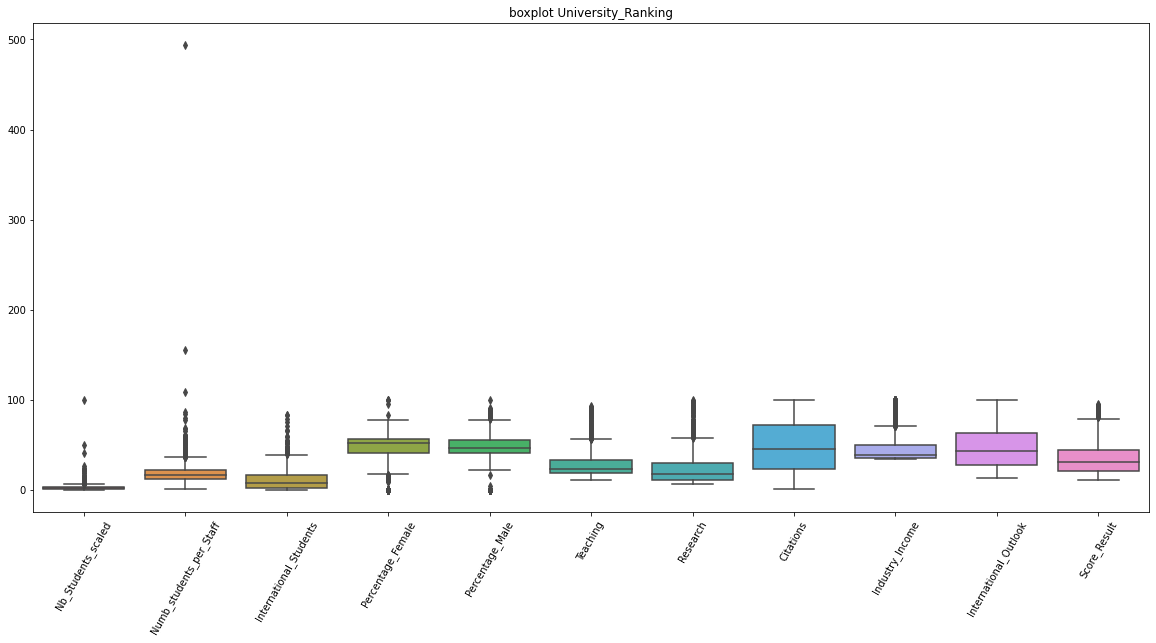

In [ ]:
#@title
plt.figure(figsize = (20, 9))
plt.title('boxplot University_Ranking')
plt.xticks(rotation = 60)
Ranking_box=sns.boxplot(data=boxplot,fliersize=5)

* On remarque l'existance de deux valeurs extrêmement aberrante du nombre d'étudiants per staff. 
* On a choisi de les éliminer afin de bien visualiser les figures.

In [ ]:
#@title
df.drop(df[df['Numb_students_per_Staff'] > 150].index, inplace=True)

#### 3.3 Scatter plots


##### ***a- étude sur les variables numériques:***

* On commence par visualiser toutes les variables deux à deux afin de tirer les relations les plus pertinentes à analyser.

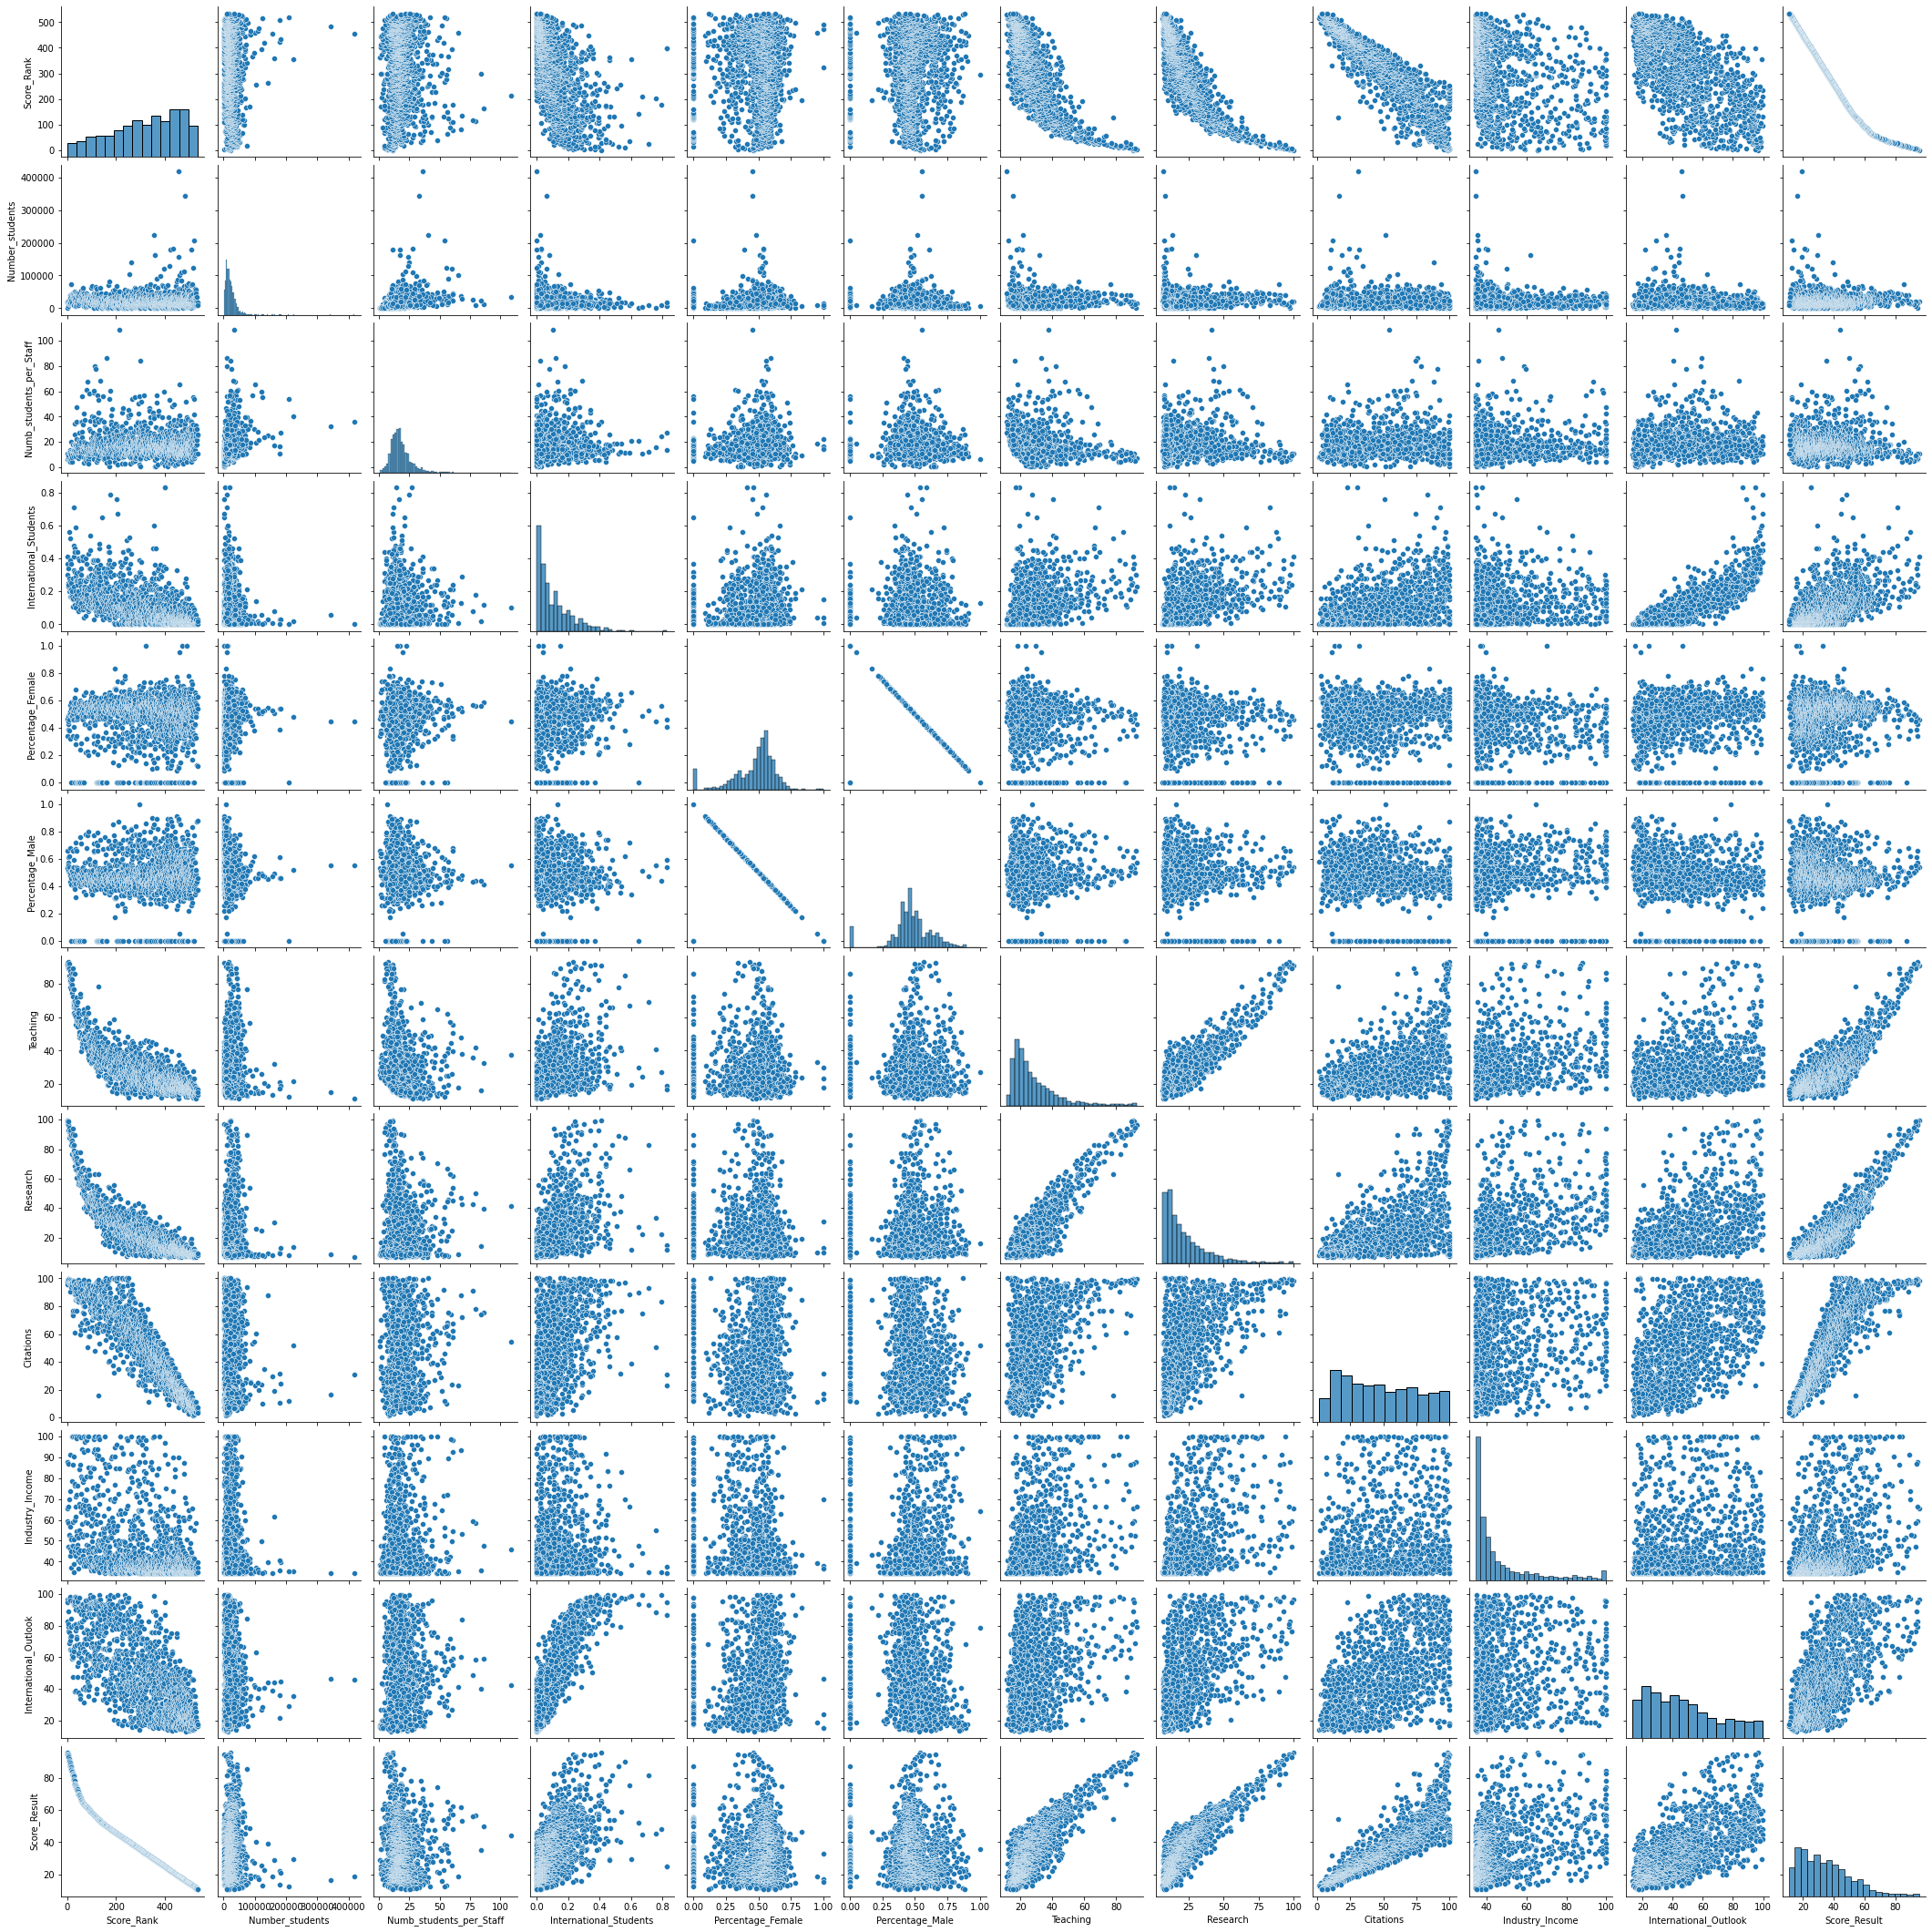

In [ ]:
#@title
#Visualisation des relations entres les variables
sns.pairplot(df)

In [ ]:
#@title
fig = px.scatter_3d(df, x='Research', y='Teaching', z='Citations',color ='Score_Result')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

* Il s'agit d'une représentation descriptive 3D qui résume la relation entre les trois variables Citations, Research et Teaching en fonction du score_rank( Respectivement score_result : plus le score_Rank est faible plus le score_result est élevé).

Text(0.5, 1.0, 'Score_Result vs. Citations')

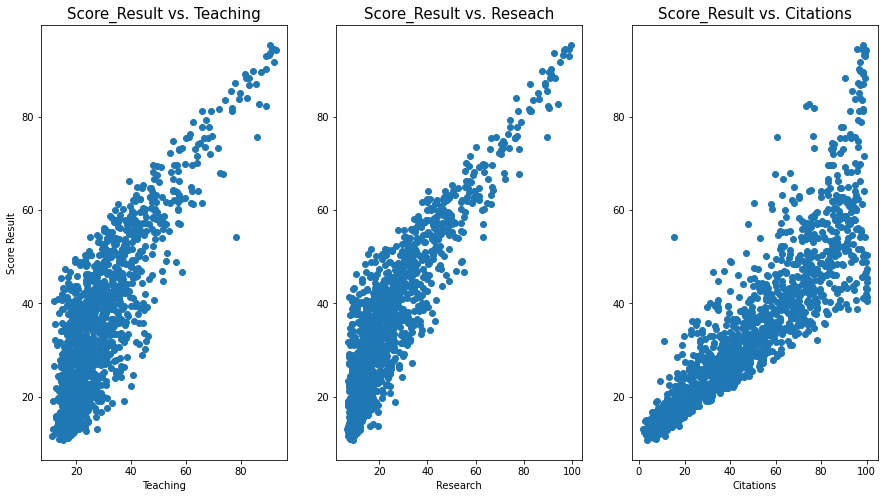

In [ ]:
#@title
#Score Result vs (Teaching, Research and Citations )

plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.scatter(y=df['Score_Result'], x=df['Teaching'])
plt.xlabel('Teaching')
plt.ylabel('Score Result')
plt.title('Score_Result vs. Teaching', fontsize=15)


plt.subplot(1,3,2)
plt.scatter(y=df['Score_Result'], x=df['Research'])
plt.xlabel('Research')
plt.title('Score_Result vs. Reseach', fontsize=15)
plt.subplot(1,3,3)
plt.scatter(y=df['Score_Result'], x=df['Citations'])
plt.xlabel('Citations')
plt.title('Score_Result vs. Citations', fontsize=15)

* Il existe une correlation positive entre Score_Result et (Research, Citations et teaching) comme était indiqué dans la carte de chaleur (heatmap). Cependant, un nombre de citations élevé ne reflète nécessairement pas une score aussi élevé.

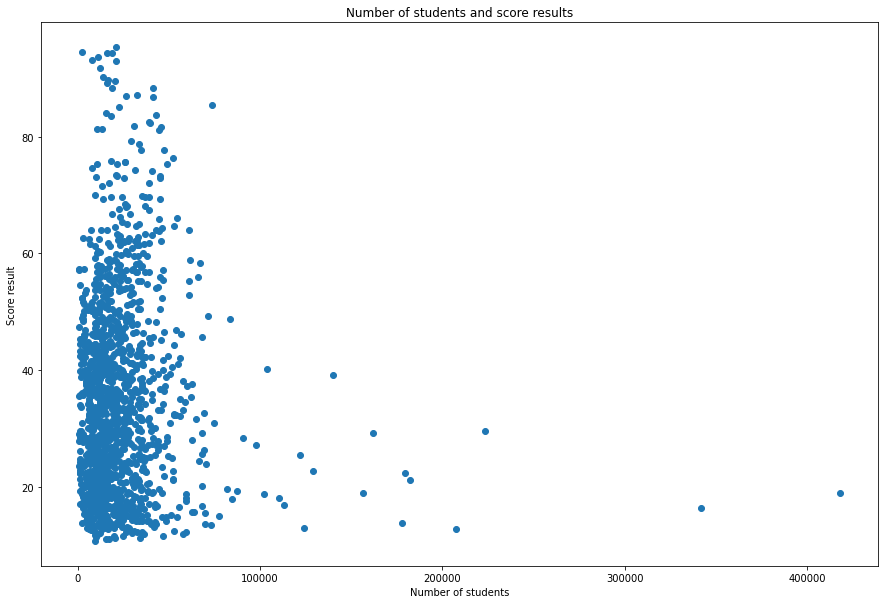

In [ ]:
#@title
plt.figure(figsize=(15,10))
plt.scatter(x=df['Number_students'], y=df['Score_Result'])
plt.xlabel('Number of students')
plt.ylabel('Score result')
plt.title('Number of students and score results')
plt.show()

La correlation entre les deux variables est presque nulle (-0,025). Cependant, on peut distinguer deux catégories d'université:
* Pour les petites universités (<100.000 étudiants) il existe une grande amplitude en terme de score_result. 
* Pour les grandes universités (>100.000 étudiants) les scores ne dépassent généralement pas 40. 


In [ ]:
#@title
fig = px.scatter(df, x='International_Students', y='International_Outlook',color ='Score_Result')
fig.update_traces(marker_size=4, marker_opacity=0.5)
fig.show()

* On peut voir que les écoles les mieux classées sont placées dans la moitié supérieure du graphe ce qui indique des valeurs plus importantes en International_Students et International_Outlook.

In [ ]:
#@title
fig = px.scatter(df, x='Research', y='Teaching',color ='Score_Result')
fig.update_traces(marker_size=4, marker_opacity=0.5)
fig.show()

* Il existe une forte correlation positive entre Reseach et Teaching (0.9). Plus, le nombre de recherche  ou/et de l'enseignement (teaching) sont élevés plus le score de l'université est élevé.

In [ ]:
#@title
fig = px.scatter(df, x='Teaching', y='Percentage_Female',color ='Score_Result')
fig.update_traces(marker_size=4, marker_opacity=0.5)
fig.show()

* Plus le niveau d'enseignement augmente, plus le score est élevé et plus on s'approche de l'égalité homme-femme dans les universités.

In [ ]:
#@title
fig = px.scatter(df,y='Score_Result', x='Industry_Income')
fig.update_traces(marker_size=4, marker_opacity=1)
fig.show()

* Pour les industries de faibles revenus, les scores des universités ne dépassent généralement pas 60. Cependant, lorsque le revenu augmente le score des universités garde une grande variance. 

In [ ]:
#@title
fig = px.scatter(df, x='Numb_students_per_Staff', y='Teaching',color ='Score_Result')
fig.update_traces(marker_size=4, marker_opacity=0.5)
fig.show()

* Plus le nombre d'étudiants par nombre de personnel augmente, plus le niveau d'enseignement diminue ainisi que le score de l'université.
* La majorité des universités ayant un score élevé, ont un nombre d'étudiants par personnel aux alentours de 15.

##### ***b- étude sur les variables catégoriques:***

* Dans cette section, on s'intéressera à l'étude des universités par rapport aux différents pays de notre base de données.

Text(0.5, 1.0, 'Score_Result in different countries ')

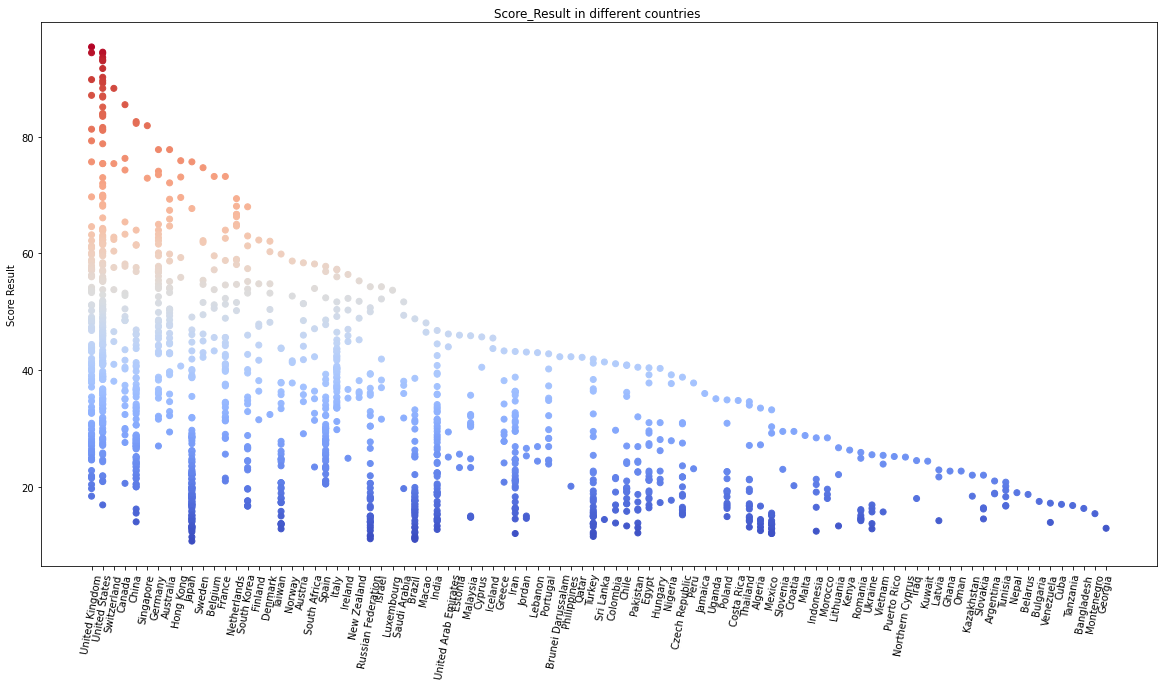

In [ ]:
#@title
plt.figure(figsize=(20,10))
plt.scatter(x=df['Country'],y=df['Score_Result'],c=df['Score_Result'],cmap='coolwarm')
plt.ylabel('Score Result')
plt.xticks(rotation=80)
plt.title('Score_Result in different countries ')

* Le nombre des universités par pays varie énormément. Presque tous les pays ont des universités avec un score inférieurs à 20.
* Les 50 premières universités ne sont pas réparties uniformément sur tous les pays. On s'intéressera par la suite à les étudier.

In [ ]:
#@title
top50 = df[df['Score_Rank'] < 50 ]
countries = top50[['Country','Score_Result']].groupby('Country').describe()
countries

Score_Result                                                    \
                      count       mean       std   min     25%    50%     75%   
Country                                                                         
Australia               2.0  74.950000  4.030509  72.1  73.525  74.95  76.375   
Belgium                 1.0  73.200000       NaN  73.2  73.200  73.20  73.200   
Canada                  3.0  78.700000  5.973274  74.3  75.300  76.30  80.900   
China                   2.0  82.450000  0.212132  82.3  82.375  82.45  82.525   
France                  1.0  73.200000       NaN  73.2  73.200  73.20  73.200   
Germany                 3.0  75.133333  2.328805  73.5  73.800  74.10  75.950   
Hong Kong               3.0  72.866667  3.156475  69.6  71.350  73.10  74.500   
Japan                   1.0  75.700000       NaN  75.7  75.700  75.70  75.700   
Singapore               2.0  77.400000  6.363961  72.9  75.150  77.40  79.650   
Sweden                  1.0  74.700000       NaN  74.7  74.700  74.70  74.700   
Switzerland             2.0  81.850000  9.121677  75.4  78.625  81.85  85.075   
United Kingdom          8.0  84.087500  9.134462  69.7  78.400  84.20  90.950   
United States          29.0  82.658621  8.534071  69.6  75.400  83.80  89.600   

                      
                 max  
Country               
Australia       77.8  
Belgium         73.2  
Canada          85.5  
China           82.6  
France          73.2  
Germany         77.8  
Hong Kong       75.9  
Japan           75.7  
Singapore       81.9  
Sweden          74.7  
Switzerland     88.3  
United Kingdom  95.4  
United States   94.5

* Les 50 meilleures universités sont réparties dans 13 pays.
* Les Etats Unis domine la liste des top 50 avec 29 universités suivie par la Royaume Unie avec seulement 8 universités. 
* On peut signaler une absence remarquable de l'Afrique dans cette liste.


---

- Parsuite, on étudie les pays dont le nombre des universités est supérieur à 40.





In [ ]:
#@title
country = df[['Country','Score_Result']].groupby('Country').describe()
country = country [country['Score_Result']['count'] >= 40]
country=country.sort_values(('Score_Result','mean'), ascending=False)
country

Score_Result                                             \
                      count       mean        std   min     25%    50%   
Country                                                                  
Germany                48.0  51.318750  11.327948  27.0  44.250  52.05   
United States         172.0  50.108140  18.490694  16.9  36.250  46.10   
United Kingdom        100.0  43.945000  17.238730  18.4  29.075  41.30   
Italy                  45.0  40.768889   6.421265  29.8  36.800  40.10   
China                  81.0  33.049383  13.096594  14.0  24.700  28.50   
Spain                  45.0  30.797778   9.258129  20.5  24.800  28.20   
India                  56.0  26.175000   8.743793  12.7  19.075  25.55   
Iran                   40.0  25.905000   7.794803  12.0  20.550  24.65   
Japan                 110.0  23.475455  10.810742  10.7  17.000  19.90   
Brazil                 46.0  19.986957   7.952962  11.0  15.375  17.60   

                              
                   75%   max  
Country                       
Germany         57.425  77.8  
United States   61.550  94.5  
United Kingdom  54.650  95.4  
Italy           43.200  57.3  
China           37.000  82.6  
Spain           33.400  57.8  
India           31.900  46.8  
Iran            32.150  43.2  
Japan           26.200  75.7  
Brazil          24.350  48.8

* Dans certains pays, il existe un écart significatif entre les universités(un écart-type de 18 pour les états unis et 17 pour la Royaume Unie) contrairement à d'autres pays, comme l'Italie, qui a un écart-type de 6.4

## III- Clustering: 


Il est temps d'entrainer nos modèles de prédiction et les évaluer.

### 1 - ACP: 

l'intéret de cette partie est de réduire le nombre de dimensions de notre jeu de données décrit par un grand nombre de variables pour 
une visualisation simplifiée et une accélération des calculs.

In [ ]:
#@title
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

In [ ]:
df.head()

Score_Rank                             University         Country  \
0           1                   University of Oxford  United Kingdom   
1           2     California Institute of Technology   United States   
2           3                University of Cambridge  United Kingdom   
3           4                    Stanford University   United States   
4           5  Massachusetts Institute of Technology   United States   

   Number_students  Numb_students_per_Staff  International_Students  \
0          20664.0                     11.2                    0.41   
1           2240.0                      6.4                    0.30   
2          18978.0                     10.9                    0.37   
3          16135.0                      7.3                    0.23   
4          11247.0                      8.6                    0.34   

   Percentage_Female  Percentage_Male  Teaching  Research  Citations  \
0               0.46             0.54      90.5      99.6       98.4   
1               0.34             0.66      92.1      97.2       97.9   
2               0.47             0.53      91.4      98.7       95.8   
3               0.43             0.57      92.8      96.4       99.9   
4               0.39             0.61      90.5      92.4       99.5   

   Industry_Income  International_Outlook  Score_Result  
0             65.5                   96.4          95.4  
1             88.0                   82.5          94.5  
2             59.3                   95.0          94.4  
3             66.2                   79.5          94.3  
4             86.9                   89.0          93.6

In [ ]:
#@title
# selection of columns
df_pca = df[['Number_students',
       'Numb_students_per_Staff', 'International_Students',
       'Percentage_Female', 'Percentage_Male', 'Teaching', 'Research',
       'Citations', 'Industry_Income', 'International_Outlook','Score_Result']]

In [ ]:
#@title
# Data preparation for PCA
X = df_pca.values
names = df["University"] # ou data.index pour avoir les intitulés
features = df_pca.columns

In [ ]:
#@title
std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

Nous voulons savoir le nombre des composantes permettant d'expliquer le maximum de la la variation de nos fonctionnalités 

In [ ]:
#@title
pca = PCA().fit(X_scaled)

Text(0, 0.5, 'cumulative explained variance')

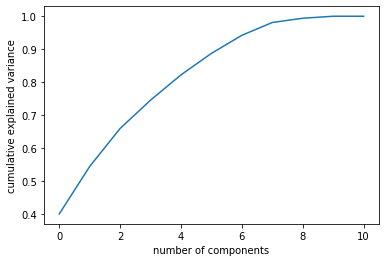

In [ ]:
#@title
#need to know first how many components are required to explain at least 90% of features variation
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Comme indiqué ci-dessus, au total, cinq composantes expliquent environ 90 % de la variation des caractéristiques de l'ensemble de données.
Explained_variance_ratio permet d'obtenir le rapport de variance (val propres/val propres totales).

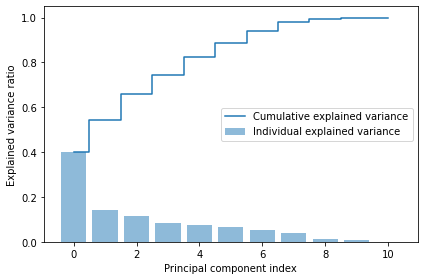

In [ ]:
#@title
pca = PCA()

# Determine transformed features

X_train_pca = pca.fit_transform(X_scaled)

# Determine explained variance using explained_variance_ration_ attribute

exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


Le graphique à barres représente les variances expliquées individuelles.
Quant au step plot, il est utilisé pour représenter la variance expliquée par les différentes composantes principales.


*On* conserve les 5 premières composantes qui conserve 90% de la variance.

In [ ]:
#@title
X_proj = pca.transform(X_scaled)

Nous pouvons maintenant visualiser les corrélations de nos composantes avec les features.

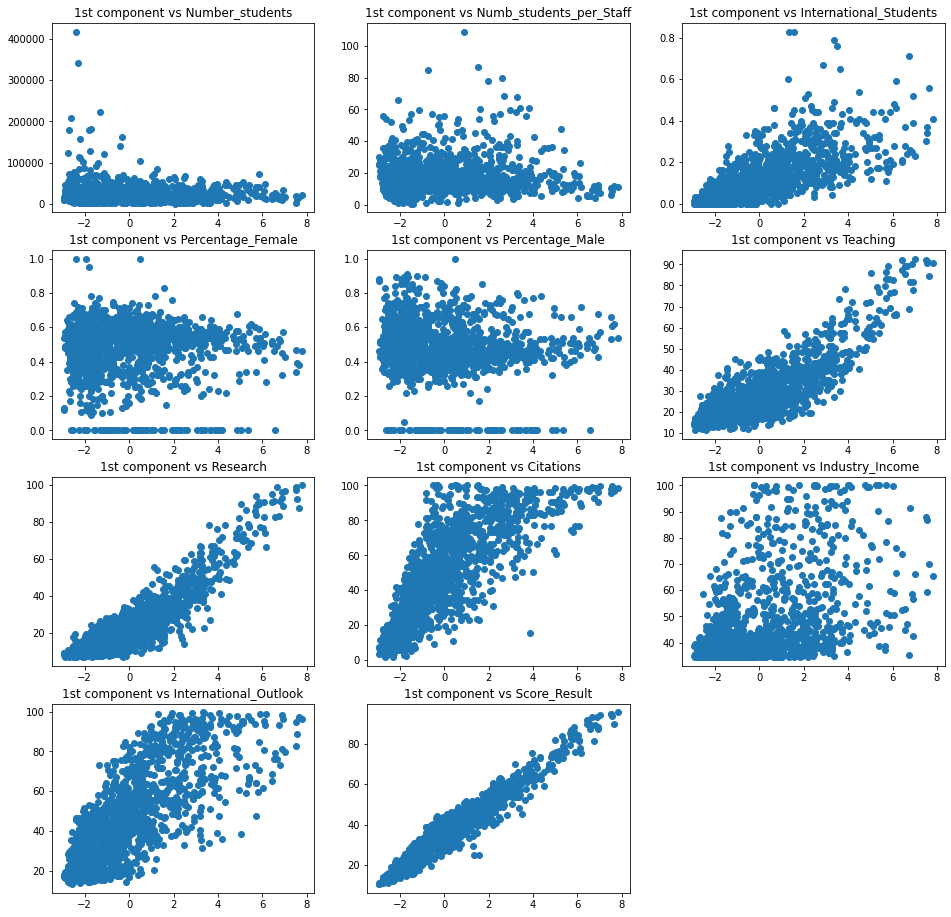

In [ ]:
#@title
_, axes = plt.subplots(ncols=11, figsize=(16,16))
for i, (ax, col) in enumerate(zip(axes, df_pca.columns.tolist())):
    plt.subplot(4,3,i+1)
    plt.scatter(X_proj[:,0], df[col])
    plt.title(f'1st component vs {col}')


* Nous pouvons voir que la première composante a une forte corrélation avec Teaching, Citations, Research, International_Outlook, and Score_Result. 

In [ ]:
#@title
_, axes = plt.subplots(ncols=11, figsize=(16,16))
for i, (ax, col) in enumerate(zip(axes, df_pca.columns.tolist())):
    plt.subplot(4,3,i+1)
    plt.scatter(X_proj[:,1], df[col])
    plt.title(f'2nd component vs {col}')



* La deuxième composante possède une forte correlation positive avec le Percentage_Male mais une forte correlation négative avec Percentage_Female.

In [ ]:
#@title
_, axes = plt.subplots(ncols=11, figsize=(16,16))
for i, (ax, col) in enumerate(zip(axes, df_pca.columns.tolist())):
    plt.subplot(4,3,i+1)
    plt.scatter(X_proj[:,2], df[col])
    plt.title(f'3rd component vs {col}')



* La troisième composante est correlée avec le Number_students et le Num_Students_per_staff.

In [ ]:
#@title
_, axes = plt.subplots(ncols=11, figsize=(16,16))
for i, (ax, col) in enumerate(zip(axes, df_pca.columns.tolist())):
    plt.subplot(4,3,i+1)
    plt.scatter(X_proj[:,3], df[col])
    plt.title(f'4th component vs {col}')


* La 4ème composante est correlée avec le Percentage_Female et Percentage_Male uniquement.

In [ ]:
#@title
_, axes = plt.subplots(ncols=11, figsize=(16,16))
for i, (ax, col) in enumerate(zip(axes, df_pca.columns.tolist())):
    plt.subplot(4,3,i+1)
    plt.scatter(X_proj[:,4], df[col])
    plt.title(f'5th component vs {col}')


Avec le 5ème compostant, on remarque que la corrélation se dégrade.

(-5.0, 5.0)

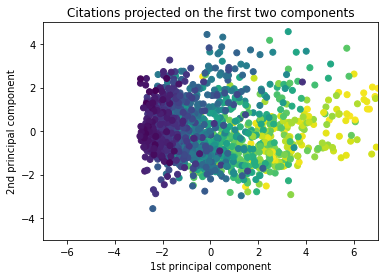

In [ ]:
#@title
plt.scatter(X_proj[:,0], X_proj[:,1], c=df['Citations'])
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Citations projected on the first two components')
plt.xlim(-7, 7)
plt.ylim(-5, 5)

(-5.0, 5.0)

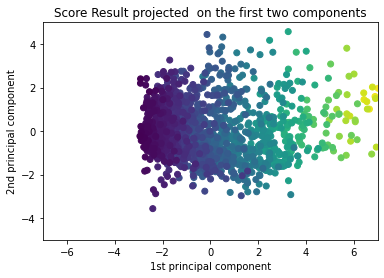

In [ ]:
#@title
plt.scatter(X_proj[:,0], X_proj[:,1], c=df['Score_Result'])
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Score Result projected  on the first two components')
plt.xlim(-7, 7)
plt.ylim(-5, 5)

* 'Citations' et 'Score_Result' sont bien correlés avec la première composante 

(-5.0, 5.0)

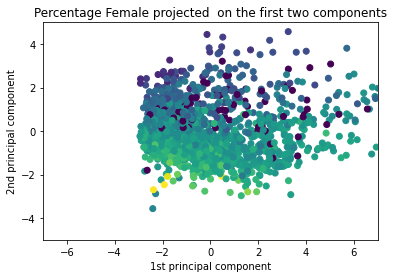

In [ ]:
#@title
plt.scatter(X_proj[:,0], X_proj[:,1], c=df['Percentage_Female'])
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Percentage Female projected  on the first two components')
plt.xlim(-7, 7)
plt.ylim(-5, 5)


'Percentage_Female' est correlé avec la 2ème composante.

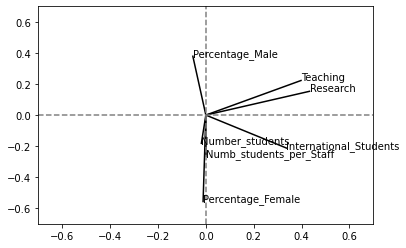

In [ ]:
#@title
components = pca.components_
for i, (x, y) in enumerate(zip(components[0,:7], components[1,:7])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, df_pca.columns[i])

plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7);


Les variables les plus proches présentent des similitudes, tel est le cas pour Number_students et Number_students_per_staff, international_students ainsi que pour les deux variables Teaching et Research.

In [ ]:
#@title
pca=PCA(n_components=5)
features_transformed=StandardScaler().fit_transform(X_scaled)
pca_df=pca.fit_transform(features_transformed)
pca_df=pd.DataFrame(pca_df,columns=['PC%i' % i for i in range(1,6)])

In [ ]:
pca_df.head()

PC1       PC2       PC3       PC4       PC5
0  7.808756  1.082261 -0.197878  0.326934 -1.121590
1  7.527918  3.054598 -0.300062  0.206249 -1.190885
2  7.531075  0.986516 -0.255105  0.532508 -1.304186
3  7.014836  1.967715 -0.011447  1.017143 -1.808079
4  7.567364  2.371638 -0.139265  0.161239 -1.008938

pca_df représente notre nouvelle dataset sur laquelle on a conservé les 5 composantes principales expliquant 90% de la variance.

### 2- K-means without PCA

Appliquons maintenant la méthode K-means avec notre jeu de données initial sans PCA. 
K-means est algorithme de clustering qui permet de regrouper le données similaires en clusters après une analyse du jeu de données.

Parameter: {'n_clusters': 2} Score 0.8834355057978034
Parameter: {'n_clusters': 3} Score 0.6156316371155353
Parameter: {'n_clusters': 4} Score 0.6146978596741263
Parameter: {'n_clusters': 5} Score 0.5875257712565132
Parameter: {'n_clusters': 6} Score 0.5508284734614428
Parameter: {'n_clusters': 15} Score 0.5325527328431116


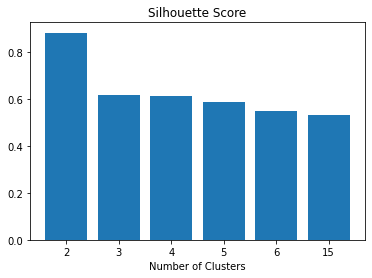

In [ ]:
#@title
parameters = [2, 3, 4, 5, 6, 15]
df_kmeans = df.drop(columns = ['University', 'Country'])
# on instancie la Gridsearch et on lui fait entrée les nombres des clusters comme entrée
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # on instancie le Kmeans
silhouette_scores = []

# on évalue notre modèle selon le silhouette score
for p in parameter_grid:
    kmeans_model.set_params(**p)    
    kmeans_model.fit(df_kmeans)          # on entraine notre modèle
    ss = metrics.silhouette_score(df_kmeans, kmeans_model.labels_)   # on calcule silhouette_score
    silhouette_scores += [ss]       # on enregistre les scores
    print('Parameter:', p, 'Score', ss)
    # on choisit la p qui donne le meilleur score
    if ss > best_score:
        best_score = ss
        best_grid = p
# vizualization
plt.bar(range(len(silhouette_scores)), list(silhouette_scores))
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.show()

Le score maximal est atteint avec un nombre de clusters qui est égal à 2.

In [ ]:
kmeans = KMeans(n_clusters=2,n_init=10,init='k-means++').fit(df_kmeans)
labels = kmeans.labels_
clusterCount = np.bincount(labels)
clusterCount

array([1374,   18])

* On constate un désequilibre fort entre les deux populations des deux clusters. Donc, dans ce cas on peut dire que le score de silhouette n'est pas un indicateur aussi informatif.

### 3 - K-means with PCA

Maintenant, appliquons le même algorithme avec l'ACP.

Parameter: {'n_clusters': 2} Score 0.3576822767791768
Parameter: {'n_clusters': 3} Score 0.23903181637289125
Parameter: {'n_clusters': 4} Score 0.2661162731055166
Parameter: {'n_clusters': 5} Score 0.24339432504173933
Parameter: {'n_clusters': 6} Score 0.25432309288440935
Parameter: {'n_clusters': 15} Score 0.21684569724149957


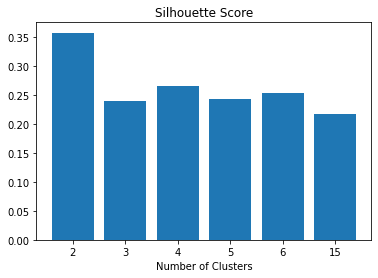

In [ ]:
#@title
parameters = [2, 3, 4, 5, 6, 15]
# on instancie la Gridsearch et on lui fait entrée les nombres des clusters comme entrée
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # on instancie le Kmeans
silhouette_scores = []

# on évalue notre modèle selon le silhouette score
for p in parameter_grid:
    kmeans_model.set_params(**p)    
    kmeans_model.fit(pca_df)          # on entraine notre modèle
    ss = metrics.silhouette_score(pca_df, kmeans_model.labels_)   # on calcule silhouette_score
    silhouette_scores += [ss]       # on enregistre les scores
    print('Parameter:', p, 'Score', ss)
    # on choisit la p qui donne le meilleur score
    if ss > best_score:
        best_score = ss
        best_grid = p
# vizualization
plt.bar(range(len(silhouette_scores)), list(silhouette_scores))
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.show()

K-means avec PCA n'est pas une bonne solution dans notre cas. Le score de silhouette est très bas en dessous de 0,35. L'utilisation d'un PCA a trop dégradé les résultats du clustering. 

### 4- Clustering hiérarchique

L'idée de l'algorithme est de rassembler les individus selon un critère de ressemblance défini au préalable à travers la distance entre chaque individu deux à deux. Ensuite, il rassemble les individus de manière itérative afin de produire un dendrogramme. Il produit des classes ou groupes de plus en plus vastes et en découpant cet arbre à une certaine hauteur choisie, on produira la partition désirée.

In [ ]:
# Standardisation des colonnes intéréssés
X_scaled_df=pd.DataFrame(X_scaled,columns=features,index=names)  
# Methode clustering hiérarchique avec disimilarité "ward"
Z = linkage(X_scaled_df,'ward') 
Z

array([[1.22100000e+03, 1.25500000e+03, 1.11887224e-01, 2.00000000e+00],
       [1.13600000e+03, 1.16400000e+03, 2.40396528e-01, 2.00000000e+00],
       [7.26000000e+02, 7.35000000e+02, 2.50053006e-01, 2.00000000e+00],
       ...,
       [2.77600000e+03, 2.77800000e+03, 4.62859388e+01, 9.99000000e+02],
       [2.77200000e+03, 2.77900000e+03, 5.12237461e+01, 3.93000000e+02],
       [2.78000000e+03, 2.78100000e+03, 8.39913241e+01, 1.39200000e+03]])

In [ ]:
#@title
metrics=['euclidean','hamming', 'cityblock' , 'cosine'] # metrics used for linkage 
methods=['single','complete','average'] # methods used for linkage
pdists=['euclidean','minkowski','cityblock','cosine']  # metrics used for pdist()
max_val=0
best_metric=None
best_method=None
best_p_dist=None

for metric1 in metrics:
    for method1 in methods:
        for pdist1 in pdists:
            Z=linkage(X_scaled_df,method1,metric=metric1)
            c, coph_dists = cophenet(Z, pdist(X_scaled_df,pdist1))
            if (c>max_val):
                max_val=c
                best_metric=metric1
                best_method=method1
                best_p_dist=pdist1
            else:
                max_val=max_val
            #print('(',method1,',',metric1,',',pdist1,') :',c)
print('the best cophenet index is about :',max_val,'which corresponds to the triple: (metric=',best_metric,',method=',best_method,'and pdist=',best_p_dist,')')

the best cophenet index is about : 0.814956132989627 which corresponds to the triple: (metric= euclidean ,method= average and pdist= euclidean )


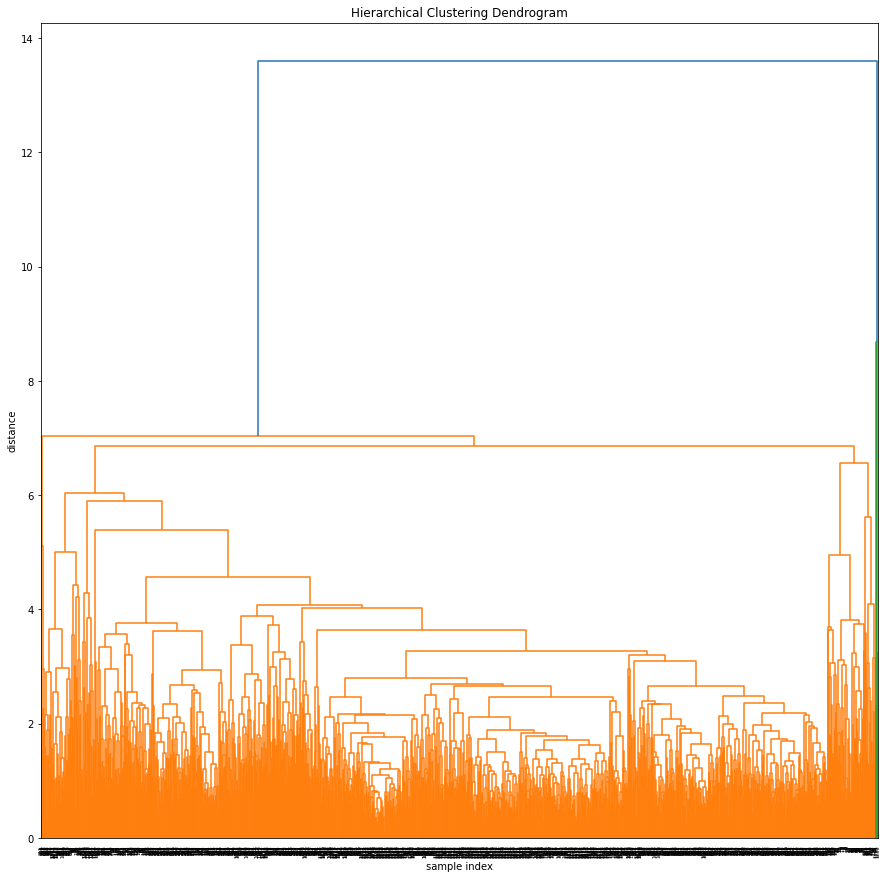

In [ ]:
#@title
# We represent the corresponding Dendrogram
plt.figure(figsize=(15,15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z = linkage(X_scaled_df, metric= 'euclidean' ,method= 'average'))
plt.show()

* Le dendogramme nous montre le nombre de clusters que l'on peut avoir en fonction du degré de similarité entre les universités.
* Plus la distance intra-cluster est petite, plus il y a de similitudes et plus il y a de clusters.
* En revanche, plus la distance intra-cluster est grande, moins il y a de similitudes et moins il y a de clusters.
Dans notre cas, on peut distinguer 2 clusters différents. Cependant, les deux clusters sont largement différents en termes de population. Ce qui est conforme avec ce que nous avons déjà fait avec K-Means.

### 5- HDBSCAN

Le DBSCAN est un algorithme simple qui définit des clusters en utilisant l'estimation de la densité locale. On peut le diviser en 4 étapes : Pour chaque observation on regarde le nombre de points à au plus une distance ε de celle-ci. On appelle cette zone le ε-voisinage de l'observation.
Le HDBSCAN est une extension de DBSCAN qui ajoute le concept de clustering hiérarchique à ce dernier.

In [ ]:
!pip install hdbscan

In [ ]:
import hdbscan

In [ ]:
#@title
df_kmeans = df.drop(columns = ['University', 'Country'])
# on initialize le clusterer
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
# avec un nombre minimum de points de données égal à 5 dans chaque cluster
clusterer.fit(df_kmeans)

HDBSCAN étend DBSCAN en le convertissant en un algorithme de clustering hiérarchique, puis en utilisant une technique pour extraire un clustering plat basé sur la stabilité des clusters.

In [ ]:
#@title
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
# We can now see the hierarchy as a dendrogram, the width (and color) of each branch representing 
# the number of points in the cluster at that level. 

Text(0, 0.5, 'Score Result')

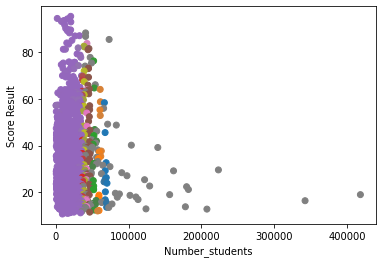

In [ ]:
#@title
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]

                  
plt.scatter(df_kmeans['Number_students'], df_kmeans['Score_Result'], c=cluster_colors)
plt.xlabel('Number_students')
plt.ylabel('Score Result')

Ce clusterer montre des mauvais résultats parce que nos données ne sont pas adéquates avec l'estimation de la densité locale.

## IV- Conclusion

Pour conclure, nous avons testé plusieurs approches de modélisation : PCA, Kmeans, clustering hiérarchique et Hdbscan.

Après prétraitement et analyse des données, nous avons constaté qu'il existe une forte corrélation entre le niveau d'enseignement, les citations, la recherche et International_outlook.

Après avoir terminé l'analyse PCA, nous avons vu que la 1ère composante était fortement corrélée à l'enseignement, aux citations, à la recherche et à l' International_outlook. La 2ème composante était fortement corrélée à Percentage_Male et Percentage_Female. La 3ème composante était fortement corrélée au Number_students et au Numb_students_per_staff.

Nous avons choisi d'effectuer l'analyse HDBSAN en définissant ses clusters ; cependant, L'analyse n'a pas permis de fournir de meilleurs clusters pour cet ensemble de données.

D'autres étapes d'ingénierie des caractéristiques peuvent être effectuées pour améliorer la modélisation comme par exemple en utilisant la décomposition du rank_char en catégories.